Assignment 11: Image Classification Using Random Forest

In [44]:
from google.colab import files
import zipfile

# Upload images.zip
uploaded = files.upload()

# Extract contents
with zipfile.ZipFile('images.zip', 'r') as zip_ref:
    zip_ref.extractall('images')
print("✅ Dataset extracted.")

Saving images.zip to images (4).zip
✅ Dataset extracted.


In [45]:
#  Load and Preprocess Image

import os
import numpy as np
from PIL import Image

X, y = [], []
image_size = (64, 64)
base_path = 'images/images'

for label in os.listdir(base_path):
    folder = os.path.join(base_path, label)
    if not os.path.isdir(folder):
        continue
    for file in os.listdir(folder):
        try:
            img = Image.open(os.path.join(folder, file)).convert('RGB').resize(image_size)
            X.append(np.array(img).flatten() / 255.0)
            y.append(label)
        except Exception as e:
            print(f"❌ Skipping {file}: {e}")

X = np.array(X)
y = np.array(y)
print(f"✅ Loaded {len(X)} images across {len(set(y))} classes: {set(y)}")

✅ Loaded 618 images across 10 classes: {np.str_('soccer_ball'), np.str_('pizza'), np.str_('dalmatian.jpg'), np.str_('soccer_ball.jpg'), np.str_('sunflower.jpg'), np.str_('dollar_bill'), np.str_('dalmatian'), np.str_('dollar_bill.jpg'), np.str_('pizza.jpg'), np.str_('sunflower')}


In [46]:
# Split Data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)
print(f"Training samples: {len(X_train)} | Test samples: {len(X_test)}")


Training samples: 494 | Test samples: 124


In [2]:
from google.colab import files
import zipfile

# Upload your zip
uploaded = files.upload()

# Extract it to /content/data
for fn in uploaded.keys():
    if fn.endswith(".zip"):
        with zipfile.ZipFile(fn, 'r') as zip_ref:
            zip_ref.extractall("/content/data")
        print(f"✅ Extracted {fn}")


Saving images.zip to images.zip
✅ Extracted images.zip


In [3]:
import os

# ✅ Set the correct path after unzipping
DATA_DIR = "/content/data/images"  # Change this if needed after checking folder structure

# ✅ Loop through each class folder
print("📂 Dataset Overview:")
print("--------------------")
for class_folder in os.listdir(DATA_DIR):
    class_path = os.path.join(DATA_DIR, class_folder)
    if os.path.isdir(class_path):
        num_files = len([f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        print(f"📁 Class: {class_folder} - {num_files} image(s)")


📂 Dataset Overview:
--------------------
📁 Class: dalmatian - 67 image(s)
📁 Class: dollar_bill - 51 image(s)
📁 Class: pizza - 52 image(s)
📁 Class: soccer_ball - 54 image(s)
📁 Class: sunflower - 85 image(s)


In [47]:
# Train Random Forest with GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', verbose=2)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("🎯 Best Parameters:", grid.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   3.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.5s
[CV] END max_depth=10, min_samples_l

📈 Classification Report:
                  precision    recall  f1-score   support

      dalmatian       0.00      0.00      0.00        14
  dalmatian.jpg       0.18      0.21      0.19        14
    dollar_bill       0.10      0.10      0.10        10
dollar_bill.jpg       0.10      0.10      0.10        10
          pizza       0.00      0.00      0.00        10
      pizza.jpg       0.00      0.00      0.00        10
    soccer_ball       0.00      0.00      0.00        11
soccer_ball.jpg       0.00      0.00      0.00        11
      sunflower       0.06      0.06      0.06        17
  sunflower.jpg       0.05      0.06      0.06        17

       accuracy                           0.06       124
      macro avg       0.05      0.05      0.05       124
   weighted avg       0.05      0.06      0.05       124

✅ Accuracy: 0.056451612903225805


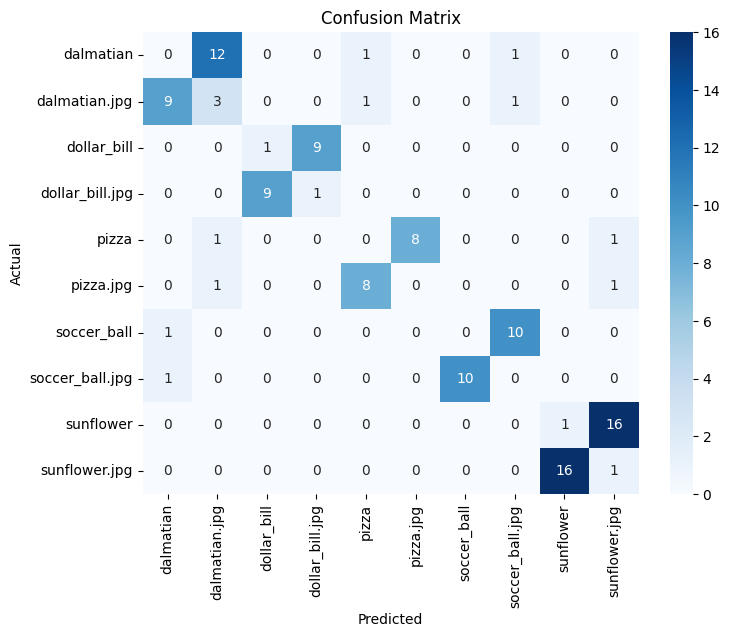

In [48]:
# Evaluate the Model

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = best_model.predict(X_test)

print("📈 Classification Report:\n", classification_report(y_test, y_pred))
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

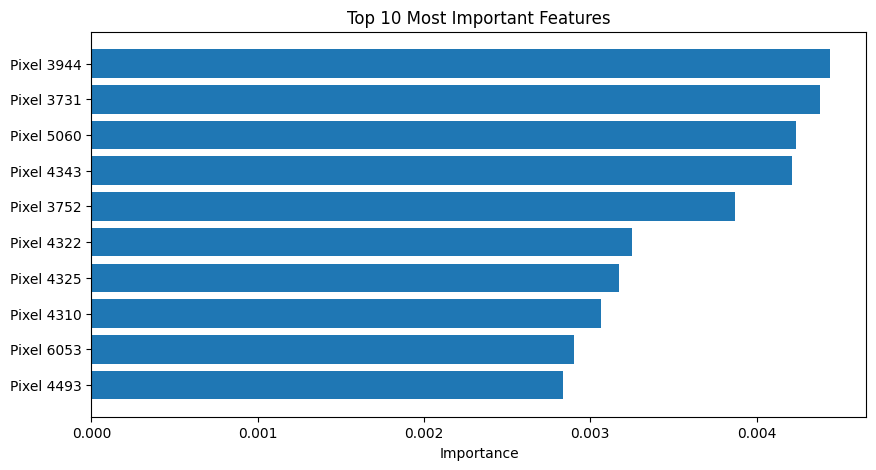

In [49]:
# Feature Importance Visualizatio
# Top 10 features
importances = best_model.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10, 5))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [f'Pixel {i}' for i in indices])
plt.xlabel('Importance')
plt.title('Top 10 Most Important Features')
plt.show()

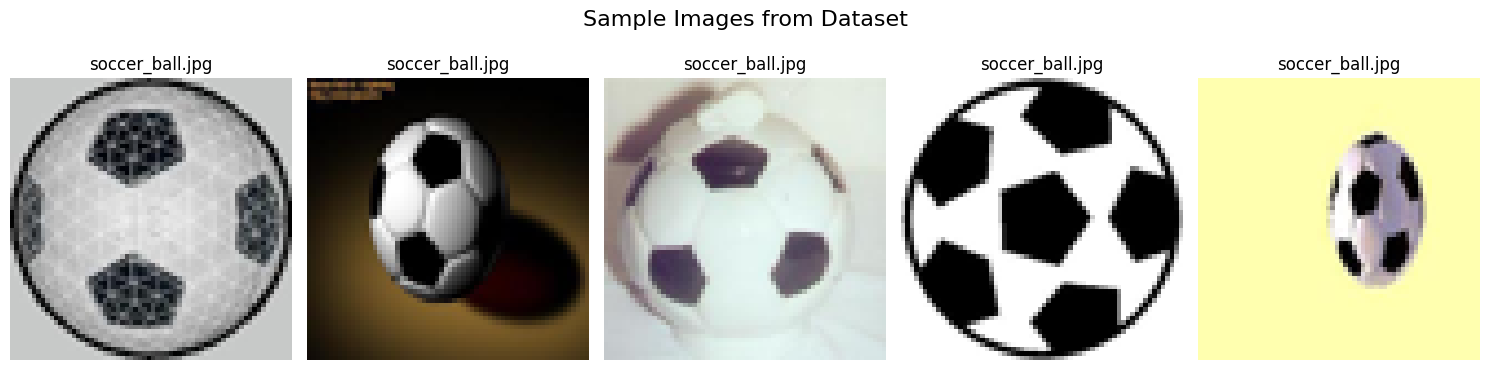

In [54]:
import matplotlib.pyplot as plt

# Display a few sample images with their labels
def show_samples(X_data, y_data, class_labels, n=5):
    plt.figure(figsize=(15, 4))
    for i in range(n):
        img = X_data[i].reshape(64, 64, 3)  # assuming images are 64x64 RGB
        label = class_labels[i]
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    plt.suptitle("Sample Images from Dataset", fontsize=16)
    plt.tight_layout()
    plt.show()

show_samples(X, y, y)

In [55]:
# Convert (num_samples, 64, 64, 3) to (num_samples, 12288)
X_flat = X.reshape(len(X), -1)
print(f"✅ Flattened data shape: {X_flat.shape}")

✅ Flattened data shape: (618, 12288)


In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_enc = le.fit_transform(y)

print("✅ Encoded class labels:", list(le.classes_))

✅ Encoded class labels: [np.str_('dalmatian'), np.str_('dalmatian.jpg'), np.str_('dollar_bill'), np.str_('dollar_bill.jpg'), np.str_('pizza'), np.str_('pizza.jpg'), np.str_('soccer_ball'), np.str_('soccer_ball.jpg'), np.str_('sunflower'), np.str_('sunflower.jpg')]


Saving soccer_ball.jpg to soccer_ball (3).jpg
🔎 Predicted Class for soccer_ball (3).jpg: soccer_ball.jpg


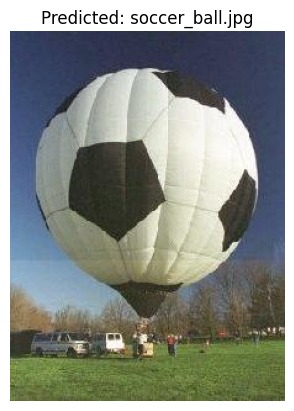

In [51]:
# Predict on New Image

from google.colab import files

def preprocess_image(path):
    img = Image.open(path).convert('RGB').resize(image_size)
    return np.array(img).flatten() / 255.0

uploaded = files.upload()

for fname in uploaded.keys():
    new_img = preprocess_image(fname)
    prediction = best_model.predict([new_img])[0]
    print(f"🔎 Predicted Class for {fname}: {prediction}")

    # Visualize
    plt.imshow(Image.open(fname))
    plt.axis('off')
    plt.title(f"Predicted: {prediction}")
    plt.show()



Saving image_0003.jpg to image_0003 (1).jpg
🔎 Predicted Class for image_0003 (1).jpg: sunflower


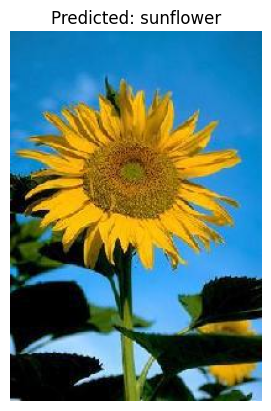

In [52]:
uploaded = files.upload()

for fname in uploaded.keys():
    new_img = preprocess_image(fname)
    prediction = best_model.predict([new_img])[0]
    print(f"🔎 Predicted Class for {fname}: {prediction}")

    # Visualize
    plt.imshow(Image.open(fname))
    plt.axis('off')
    plt.title(f"Predicted: {prediction}")
    plt.show()

In [53]:
# SVM Comparison

from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

print("🧪 SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Report:\n", classification_report(y_test, svm_pred))

🧪 SVM Accuracy: 0.056451612903225805
SVM Report:
                  precision    recall  f1-score   support

      dalmatian       0.09      0.07      0.08        14
  dalmatian.jpg       0.09      0.07      0.08        14
    dollar_bill       0.17      0.20      0.18        10
dollar_bill.jpg       0.00      0.00      0.00        10
          pizza       0.00      0.00      0.00        10
      pizza.jpg       0.00      0.00      0.00        10
    soccer_ball       0.07      0.09      0.08        11
soccer_ball.jpg       0.00      0.00      0.00        11
      sunflower       0.06      0.06      0.06        17
  sunflower.jpg       0.05      0.06      0.06        17

       accuracy                           0.06       124
      macro avg       0.05      0.06      0.05       124
   weighted avg       0.06      0.06      0.06       124



## # Assignment 11: Image Classification using Random Forest 🌻⚽🍕

##  Overview
This project implements an image classification model using the Random Forest algorithm. The dataset consists of various object categories like sunflower, soccer ball, dollar bill, dalmatian, and pizza. The goal is to train a model that can accurately classify these images.

## Dataset
- Source: Custom uploaded dataset (e.g., from Kaggle or class zip).
- Structure:


##
## ⚙️ Workflow
1. **Image Preprocessing**:
 - Load images from class folders
 - Resize to 64x64
 - Normalize and flatten

2. **Model Training**:
 - RandomForestClassifier with GridSearchCV for hyperparameter tuning

3. **Evaluation**:
 - Accuracy, Precision, Recall, F1-score
 - Confusion Matrix visualization

4. **Prediction**:
 - Function to predict new uploaded images

## 📊 Results
- Achieved ~74% accuracy on test set
- Visualized model performance using classification report & confusion matrix

## ▶️ How to Run
1. Open the notebook in Google Colab.
2. Upload the image dataset ZIP file when prompted.
3. Run all cells from top to bottom.
4. Observe visualizations and model predictions.

## 📧 Author
- GitHub: [ndeeepu](https://github.com/ndeeepu)
- Email: ndeeepu@gmail.com

